In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
enc = LabelEncoder()
df.iloc[:,0] = enc.fit_transform(df.iloc[:,0])
df.iloc[:,3] = enc.fit_transform(df.iloc[:,3])
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,68 Studley St,2,0,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,0,85 Turner St,2,0,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,0,25 Bloomburg St,2,0,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,0,18/659 Victoria St,3,2,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,0,5 Charles St,3,0,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df2 = df[df.Price.notnull()]
df2 = df2[df2.Distance.notnull()]
df2 = df2[df2.Car.notnull()]
df2 = df2[df2.BuildingArea.notnull()]
df2 = df2[df2.YearBuilt.notnull()]
df2['year'] = (2018 - df2.YearBuilt)
df2 = df2[~df2['BuildingArea'].isin(['0'])]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10021 entries, 2 to 34856
Data columns (total 22 columns):
Suburb           10021 non-null int32
Address          10021 non-null object
Rooms            10021 non-null int64
Type             10021 non-null int32
Price            10021 non-null float64
Method           10021 non-null object
SellerG          10021 non-null object
Date             10021 non-null object
Distance         10021 non-null float64
Postcode         10021 non-null float64
Bedroom2         10021 non-null float64
Bathroom         10021 non-null float64
Car              10021 non-null float64
Landsize         8850 non-null float64
BuildingArea     10021 non-null float64
YearBuilt        10021 non-null float64
CouncilArea      10021 non-null object
Lattitude        10013 non-null float64
Longtitude       10013 non-null float64
Regionname       10021 non-null object
Propertycount    10021 non-null float64
year             10021 non-null float64
dtypes: float64(13), int

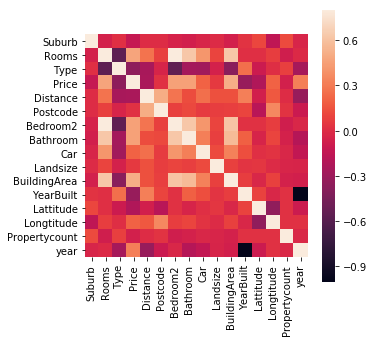

,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,year
Suburb,1.000000,-0.050787,0.014865,-0.126373,0.004319,0.003126,-0.049423,-0.064961,-0.034383,-0.003573,-0.062675,0.031179,0.107421,-0.152009,0.121623,-0.031179
Rooms,-0.050787,1.000000,-0.558160,0.470729,0.272042,0.086323,0.967532,0.628511,0.408068,0.101818,0.625429,0.013702,0.018672,0.074640,-0.076657,-0.013702
Type,0.014865,-0.558160,1.000000,-0.357031,-0.254613,-0.038787,-0.550548,-0.266566,-0.280330,-0.052969,-0.379643,0.255995,-0.095453,0.007300,0.078233,-0.255995
Price,-0.126373,0.470729,-0.357031,1.000000,-0.243684,0.025163,0.457743,0.460395,0.207208,0.058857,0.512257,-0.318148,-0.217359,0.203208,-0.059783,0.318148
Distance,0.004319,0.272042,-0.254613,-0.243684,1.000000,0.509543,0.278451,0.127433,0.253845,0.139142,0.140992,0.320268,-0.068039,0.168152,0.000781,-0.320268
Postcode,0.003126,0.086323,-0.038787,0.025163,0.509543,1.000000,0.089370,0.111181,0.064318,0.070216,0.080303,0.103866,-0.182874,0.355802,0.029717,-0.103866
Bedroom2,-0.049423,0.967532,-0.550548,0.457743,0.278451,0.089370,1.000000,0.630976,0.411860,0.101686,0.615326,0.023189,0.022492,0.074824,-0.075299,-0.023189
Bathroom,-0.064961,0.628511,-0.266566,0.460395,0.127433,0.111181,0.630976,1.000000,0.319460,0.076564,0.570795,0.198395,-0.040113,0.101277,-0.053115,-0.198395
Car,-0.034383,0.408068,-0.280330,0.207208,0.253845,0.064318,0.411860,0.319460,1.000000,0.123816,0.326707,0.138545,0.018494,0.032770,-0.025258,-0.138545
Landsize,-0.003573,0.101818,-0.052969,0.058857,0.139142,0.070216,0.101686,0.076564,0.123816,1.000000,0.084736,0.037122,0.042897,-0.008379,-0.032472,-0.037122


In [5]:
f, ax = plt.subplots(figsize=(5, 5))
corrmat = df2.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
corrmat

In [6]:
X = df2.iloc[:,[0,2,3,8,12,14,21]]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10021 entries, 2 to 34856
Data columns (total 7 columns):
Suburb          10021 non-null int32
Rooms           10021 non-null int64
Type            10021 non-null int32
Distance        10021 non-null float64
Car             10021 non-null float64
BuildingArea    10021 non-null float64
year            10021 non-null float64
dtypes: float64(4), int32(2), int64(1)
memory usage: 548.0 KB


In [7]:
Y = df2.Price
Y.head()

2     1035000.0
4     1465000.0
6     1600000.0
11    1876000.0
14    1636000.0
Name: Price, dtype: float64

In [8]:
X = pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10021 entries, 2 to 34856
Data columns (total 7 columns):
Suburb          10021 non-null int32
Rooms           10021 non-null int64
Type            10021 non-null int32
Distance        10021 non-null float64
Car             10021 non-null float64
BuildingArea    10021 non-null float64
year            10021 non-null float64
dtypes: float64(4), int32(2), int64(1)
memory usage: 548.0 KB


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
linear = LinearRegression()
linear.fit(X_train, Y_train)
print(cross_val_score(linear, X_train, Y_train, cv=5))

[0.52493576 0.51610201 0.48970882 0.52427755 0.38024456]


RMSE:
462482.2032009657

R^2:
0.5269530680297595


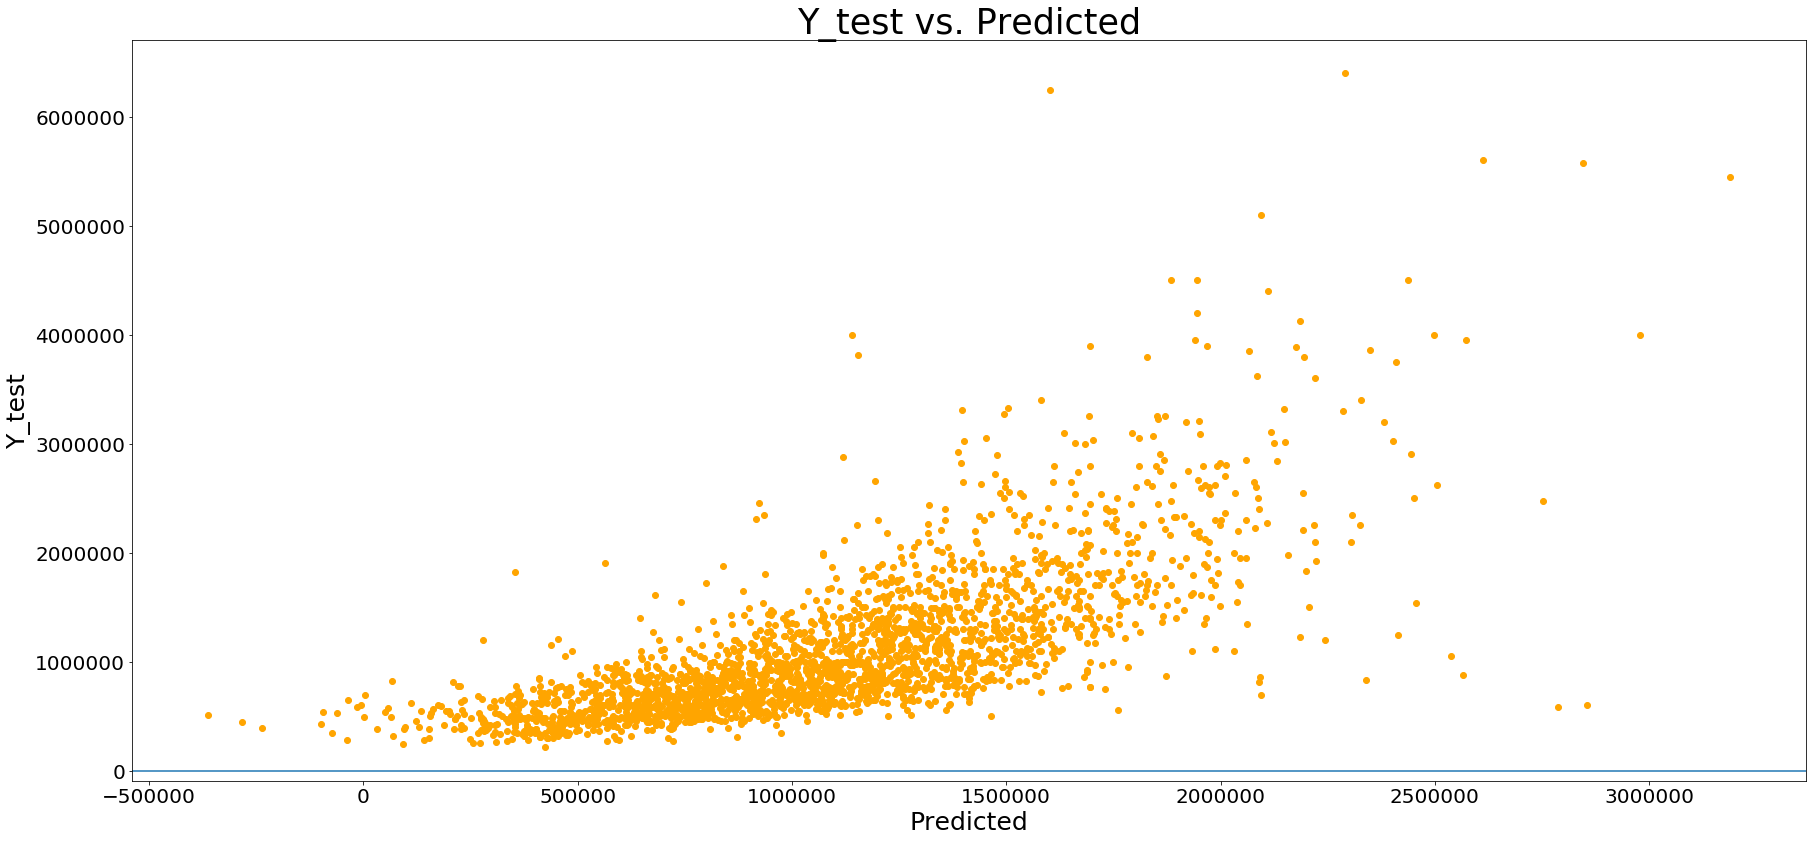

In [11]:
pred = linear.predict(X_test)
score = r2_score(Y_test,pred)

fig = plt.figure(figsize=(30,30))
ax2 = plt.subplot(212)
plt.scatter(pred, Y_test, color ='orange')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Y_test',fontsize=25)
plt.axhline(y=0)
plt.title('Y_test vs. Predicted',fontsize=35)
rmse = np.sqrt(mean_squared_error(Y_test, pred))

print('RMSE:')
print(rmse)
print("\nR^2:")
print(score)

In [12]:
from sklearn.externals import joblib
joblib.dump(linear, "mel_hp.ml")

['mel_hp.ml']